In [37]:
import pandas as pd
import numpy as np

import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import(
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
)

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso


import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

<h3>Data Preparation</h3>

In [39]:
df= pd.read_csv('MobilePhonedata_new2.csv')
df.head()

,Unnamed: 0,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,0,Huawei,Y5 Prime,16.0,2.0,Android,5.45,1,1,0,1,5000
1,1,Huawei,Y5,16.0,2.0,Android,5.71,1,1,0,1,5000
2,2,Apple,iPhone 4S,16.0,0.5,iOS,3.50,0,0,0,0,5000
3,3,Huawei,Y5,16.0,2.0,Android,5.71,0,0,0,0,5000
4,4,Huawei,Y5,16.0,2.0,Android,5.71,1,0,0,0,5000


In [40]:
df = df.iloc[: , 1:]
X=df.drop("Price", axis=1)
y=df[["Price"]]
df.head()

,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,Huawei,Y5 Prime,16.0,2.0,Android,5.45,1,1,0,1,5000
1,Huawei,Y5,16.0,2.0,Android,5.71,1,1,0,1,5000
2,Apple,iPhone 4S,16.0,0.5,iOS,3.50,0,0,0,0,5000
3,Huawei,Y5,16.0,2.0,Android,5.71,0,0,0,0,5000
4,Huawei,Y5,16.0,2.0,Android,5.71,1,0,0,0,5000


In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40023 entries, 0 to 40022
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               40023 non-null  object 
 1   Model               40023 non-null  object 
 2   ROM                 40023 non-null  float64
 3   RAM                 40023 non-null  float64
 4   OS                  40023 non-null  object 
 5   Screen size         40023 non-null  float64
 6   Dual Sim            40023 non-null  int64  
 7   Expandable Memory   40023 non-null  int64  
 8   5G                  40023 non-null  int64  
 9   Fingerprint Sensor  40023 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 3.1+ MB


In [42]:
y

,Price
0,5000
1,5000
2,5000
3,5000
4,5000
...,...
40018,50050
40019,57000
40020,60060
40021,40060


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [44]:
#split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.1, random_state=42
)

<h3>Ridge Regression</h3>

In [45]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = Ridge(alpha=0.02)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9747566243626974
MAE 4570.339969309046


Text(0, 0.5, 'Frequency')

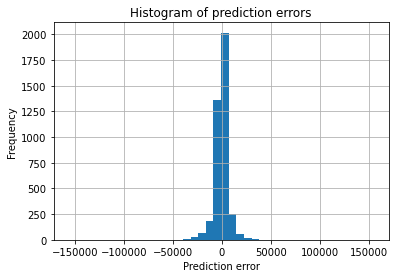

In [46]:
diff = y_test - y_pred
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

<h3>Lasso Regression</h3>

In [14]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9750798920690823
MAE 4548.6821444409225


In [15]:
# diff = y_test - y_pred
# diff.hist(bins = 40)
# plt.title('Histogram of prediction errors')
# plt.xlabel('Prediction error')
# plt.ylabel('Frequency')

ValueError: Unable to coerce to Series, length must be 1: given 4003

<h3>KNeighbours Regression</h3>

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=4)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

<h3>DecisionTree Regression</h3>

In [17]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9692670263022329
MAE 5018.177626687986


<h3>Support Vector Regression</h3>

In [18]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=100,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.27580564317456935
MAE 22101.996810768575


<h3>Random Forest Regression</h3>

In [19]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=350,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15
                                )

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9712781759403388
MAE 4877.925485055684


<h3>Gradient Boosting Regression</h3>

In [12]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = GradientBoostingRegressor(learning_rate=0.02, subsample=0.9, n_estimators=5000, max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

KeyboardInterrupt: 

<h3>XGB Regression</h3>

In [22]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9723980356799575
MAE 5096.0608835365665


<h3>Stacking Regression</h3>

In [51]:
from sklearn.ensemble import StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=300,random_state=4,max_samples=0.67,max_features=0.291,max_depth=30)),
    ('gbdt',GradientBoostingRegressor(n_estimators=754,max_features=0.5)),
    ('knn',KNeighborsRegressor(n_neighbors=3))

]
#     ('xgb', XGBRegressor(n_estimators=50,learning_rate=0.5,max_depth=10))
step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=0.05))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

KeyboardInterrupt: 

In [48]:
data = y_test.copy()
data["pred"] = y_pred
data["residual"] = data["Price"] - data["pred"]
data.head()

,Price,pred,residual
9766,22000,22332.641269,-332.641269
22672,39000,39561.301681,-561.301681
2300,11000,10586.737913,413.262087
15956,29500,46472.634078,-16972.634078
27170,49000,45681.814792,3318.185208


In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(data["pred"], data["residual"], color="violet")
plt.title("Predicted Price vs Residual for Stacking Regressor", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

In [27]:
query = np.array(["Apple","iPhone 12",128.0, 4.0,"iOS",5.1,0,0,1,0])

query = query.reshape(1, 10)
print(query[0])
ans=pipe.predict(query)[0]
ans = round(ans,2)
print("The predicted price for given configuration is: ",ans)


['Apple' 'iPhone 12' '128.0' '4.0' 'iOS' '5.1' '0' '0' '1' '0']
The predicted price for given configuration is:  165722.58


In [25]:
query = np.array(["Apple","iPhone X",64.0, 3.0,"iOS",5.8,0,0,1,0])

query = query.reshape(1, 10)
print(query[0])
ans=pipe.predict(query)[0]
ans = round(ans,2)
print("The predicted price for given configuration is: ",ans)


['Apple' 'iPhone X' '64.0' '3.0' 'iOS' '5.8' '0' '0' '1' '0']
The predicted price for given configuration is:  81288.59


In [14]:
query = np.array(["Apple","iPhone 8",64.0, 2.0,"iOS",4.7,0,0,0,0])

query = query.reshape(1, 10)
print(query[0])
ans=pipe.predict(query)[0]
ans = round(ans,2)
print("The predicted price for given configuration is: ",ans)


['Apple' 'iPhone 8' '64.0' '2.0' 'iOS' '4.7' '0' '0' '0' '0']
The predicted price for given configuration is:  49013.07


In [27]:
# import pickle

# pickle.dump(df,open('df.pkl','wb'))
# pickle.dump(pipe,open('pipe.pkl','wb'))